In [10]:
import scipy.io
import numpy as np
from matplotlib import pyplot as plt

 #read in the data:
filename = '/Users/nataliabielczyk/Desktop/variousprojects/Adela/Adela_dane/subj101_MA_Natalia.mat'
data = scipy.io.loadmat(filename)
timeseries = data['EEG']['data'][0,0] #58 channels x the full run of 25min
nchannels = timeseries.shape[0]

In [2]:
# read channel names:
channels = []
for ind in range(nchannels):
    channels.append(str(data['EEG']['chanlocs'][0,0][0,ind][0][0]))

In [3]:
important_channels = ['C3','FCz'] 

In [4]:
ind_important_channels = []
for ind in range(len(important_channels)):
    ind_important_channels.append(channels.index(important_channels[ind]))

In [5]:
timeseries = np.transpose(timeseries)
print timeseries.shape

(1471844, 58)


In [8]:
# find the visual keys in the datasets:
indexes_visualkeys = []
visual_keys = []

nevents = data['EEG']['event'][0,0].shape[1]
for ind in range(nevents):
    type_event = data['EEG']['event'][0,0][0,ind][0][0]
    if type_event == 'visual_cue_e' or type_event == 'visual_cue_l':
        indexes_visualkeys.append(ind)

for ind in range(len(indexes_visualkeys)):      
    visual_keys.append(int(data['EEG']['event'][0,0][0,indexes_visualkeys[ind]][2][0][0]))
    
print visual_keys    
nepochs = len(visual_keys)
# resting state with eyes open do 17615, eyes closed to 35412
# first visual cue: 35523

[355227, 363717, 375187, 386842, 398480, 410072, 421789, 433618, 443307, 454838, 466503, 478094, 489741, 501380, 513192, 524949, 536836, 548677, 560646, 572596, 584508, 596470, 608457, 619586, 630854, 642665, 653000, 662325, 674120, 686151, 698050, 709867, 721902, 733225, 745173, 756858, 768768, 780578, 792320, 804209, 815852, 827806, 839592, 851423, 863308, 875106, 886994, 898592, 908812, 919472, 931055, 942758, 954644, 966643, 978624, 990555, 1002495, 1014423, 1026381, 1037139, 1049089, 1061003, 1072867, 1084552, 1096451, 1108349, 1120279, 1131883, 1143885, 1155755, 1167386, 1177989, 1189102, 1200215, 1212169, 1224185, 1236094, 1247856, 1259785, 1271715, 1283707, 1295737, 1307772, 1318253, 1330288, 1342318, 1354353, 1366355, 1378385, 1390395, 1402425, 1414391, 1426422, 1438457, 1450492, 1462522]


##### 

In [ ]:
# plot coherence between each pair of channels, for the first 10, and for the last 10 epochs:
fs   = 1000 # [Hz]
NFFT = 128
corrs = []
    
# coherence function:


for ind1 in range(nchannels):
    for ind2 in range(nchannels):
        print str(ind1+1) + ',' + str(ind2+1)
        all_coh = np.zeros((65,nepochs))
        for ind in range(nepochs):
            epoch = timeseries[visual_keys[ind]:visual_keys[ind] + 2000, [ind1,ind2]]
            cxy, f = plt.cohere(epoch[:,0], epoch[:,1], NFFT, fs)
            #plt.xlabel('Frequency [Hz]')
            #plt.ylabel('Coherence')
            #plt.title('Epoch '+str(ind+1))
            #plt.show()
            
            all_coh[:,ind] = cxy    
        beginning = all_coh[:,0:5]
        ending = all_coh[:,91:-1]
    
        beginning_mean = np.mean(beginning,axis=1)
        beginning_std = np.std(beginning,axis=1)

        ending_mean = np.mean(ending,axis=1)
        ending_std = np.std(ending,axis=1)

        plt.figure()
        plt.plot(f, beginning_mean, 'k', color='#CC4F1B')
        plt.fill_between(f, beginning_mean - beginning_std, beginning_mean + beginning_std,
            alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')

        plt.plot(f, ending_mean, 'k', color='#4C9900')
        plt.fill_between(f, ending_mean - ending_std, ending_mean + ending_std,
            alpha=0.5, edgecolor='#4C9900', facecolor='#CCFF99')
            
        plt.title('Coherence, ' + channels[ind1] + ' - ' + channels[ind2])
        plt.show()

(1471844, 58)


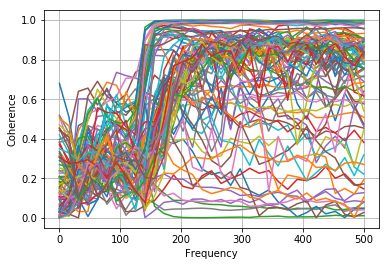

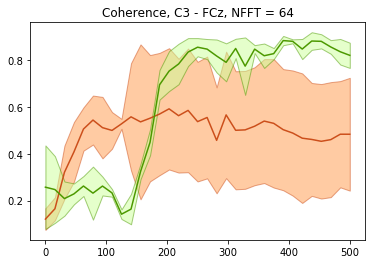

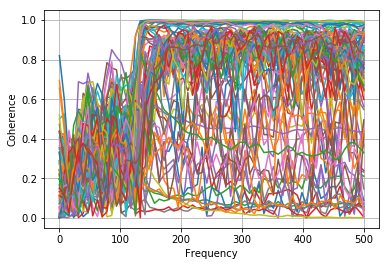

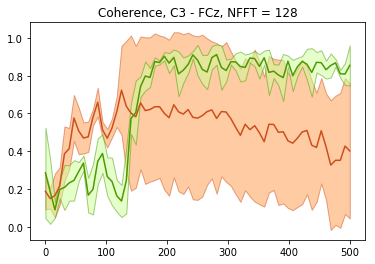

In [13]:
#all_coh = np.zeros((129,nepochs))
#all_coh = np.zeros((65,nepochs))
fs   = 1000 # [Hz]
timeseries = np.transpose(timeseries)
print timeseries.shape

# NFFT = 64:
NFFT = 64
all_coh = np.zeros((33,nepochs))
for ind in range(nepochs):
    epoch = timeseries[visual_keys[ind]:visual_keys[ind] + 2000, [ind_important_channels[0],ind_important_channels[1]]]
    cxy, f = plt.cohere(epoch[:,0], epoch[:,1], NFFT, fs)
    #plt.xlabel('Frequency [Hz]')
    #plt.ylabel('Coherence')
    #plt.title('Epoch ' + str(ind+1))
    #plt.show()
            
    all_coh[:,ind] = cxy    
    
beginning = all_coh[:,0:5]
ending = all_coh[:,91:-1]
    
beginning_mean = np.mean(beginning,axis=1)
beginning_std = np.std(beginning,axis=1)

ending_mean = np.mean(ending,axis=1)
ending_std = np.std(ending,axis=1)

plt.figure()
plt.plot(f, beginning_mean, 'k', color='#CC4F1B')
plt.fill_between(f, beginning_mean - beginning_std, beginning_mean + beginning_std,
    alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')

plt.plot(f, ending_mean, 'k', color='#4C9900')
plt.fill_between(f, ending_mean - ending_std, ending_mean + ending_std,
    alpha=0.5, edgecolor='#4C9900', facecolor='#CCFF99')

plt.title('Coherence, ' + important_channels[0] + ' - ' + important_channels[1] + ', NFFT = 64')
plt.show()


# -----------------------------
# NFFT = 128:
NFFT = 128
all_coh = np.zeros((65,nepochs))
for ind in range(nepochs):
    epoch = timeseries[visual_keys[ind]:visual_keys[ind] + 2000, [ind_important_channels[0],ind_important_channels[1]]]
    cxy, f = plt.cohere(epoch[:,0], epoch[:,1], NFFT, fs)
    #plt.xlabel('Frequency [Hz]')
    #plt.ylabel('Coherence')
    #plt.title('Epoch ' + str(ind+1))
    #plt.show()
            
    all_coh[:,ind] = cxy    
    
beginning = all_coh[:,0:5]
ending = all_coh[:,91:-1]
    
beginning_mean = np.mean(beginning,axis=1)
beginning_std = np.std(beginning,axis=1)

ending_mean = np.mean(ending,axis=1)
ending_std = np.std(ending,axis=1)

plt.figure()
plt.plot(f, beginning_mean, 'k', color='#CC4F1B')
plt.fill_between(f, beginning_mean - beginning_std, beginning_mean + beginning_std,
    alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')

plt.plot(f, ending_mean, 'k', color='#4C9900')
plt.fill_between(f, ending_mean - ending_std, ending_mean + ending_std,
    alpha=0.5, edgecolor='#4C9900', facecolor='#CCFF99')

plt.title('Coherence, ' + important_channels[0] + ' - ' + important_channels[1] + ', NFFT = 128')
plt.show()